In [6]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload files


Saving store.csv to store.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [11]:

import pandas as pd

# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
store_df = pd.read_csv('store.csv')

# Display the first few rows of each dataset
print("Train Dataset:")
print(train_df.head())

print("\nTest Dataset:")
print(test_df.head())

print("\nStore Dataset:")
print(store_df.head())


Train Dataset:
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  

Test Dataset:
   Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1            0              0
1   2      3          4  2015-09-17   1.0      1            0              0
2   3      7          4  2015-09-17   1.0      1            0              0
3   4      8          4  2015-09-17   1.0      1            0            

<ipython-input-11-0ea31e72239d>:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('train.csv')


In [12]:
print("Train missing values:\n", train_df.isnull().sum())
print("\nTest missing values:\n", test_df.isnull().sum())
print("\nStore missing values:\n", store_df.isnull().sum())

Train missing values:
 Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Test missing values:
 Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

Store missing values:
 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [57]:
# Fill missing values in the 'Open' column with the mode
test_df['Open'] = test_df['Open'].fillna(test_df['Open'].mode()[0])

# Check if missing values are handled
print("Missing values in 'Open' column after filling:", test_df['Open'].isnull().sum())

Missing values in 'Open' column after filling: 0


In [16]:
# Fill missing values in the store dataset
store_df['CompetitionDistance'] = store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median())
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna(-1)
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].fillna(-1)
store_df['Promo2SinceWeek'] = store_df['Promo2SinceWeek'].fillna(-1)
store_df['Promo2SinceYear'] = store_df['Promo2SinceYear'].fillna(-1)
store_df['PromoInterval'] = store_df['PromoInterval'].fillna(-1)

# Check if missing values are handled
print("Missing values in store dataset after filling:")
print(store_df.isnull().sum())

Missing values in store dataset after filling:
Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


In [17]:
# Convert 'Date' column to datetime
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

# Check the updated 'Date' column
print("Train 'Date' column after conversion:")
print(train_df['Date'].head())

print("\nTest 'Date' column after conversion:")
print(test_df['Date'].head())

Train 'Date' column after conversion:
0   2015-07-31
1   2015-07-31
2   2015-07-31
3   2015-07-31
4   2015-07-31
Name: Date, dtype: datetime64[ns]

Test 'Date' column after conversion:
0   2015-09-17
1   2015-09-17
2   2015-09-17
3   2015-09-17
4   2015-09-17
Name: Date, dtype: datetime64[ns]


In [18]:
# Extract weekdays from 'Date'
train_df['Weekday'] = train_df['Date'].dt.day_name()
test_df['Weekday'] = test_df['Date'].dt.day_name()

# Check the new 'Weekday' column
print("Train 'Weekday' column:")
print(train_df[['Date', 'Weekday']].head())

print("\nTest 'Weekday' column:")
print(test_df[['Date', 'Weekday']].head())

Train 'Weekday' column:
        Date Weekday
0 2015-07-31  Friday
1 2015-07-31  Friday
2 2015-07-31  Friday
3 2015-07-31  Friday
4 2015-07-31  Friday

Test 'Weekday' column:
        Date   Weekday
0 2015-09-17  Thursday
1 2015-09-17  Thursday
2 2015-09-17  Thursday
3 2015-09-17  Thursday
4 2015-09-17  Thursday


In [19]:
# Create a binary flag for weekends
train_df['Weekend'] = train_df['Date'].dt.dayofweek.isin([5, 6]).astype(int)
test_df['Weekend'] = test_df['Date'].dt.dayofweek.isin([5, 6]).astype(int)

# Check the new 'Weekend' column
print("Train 'Weekend' column:")
print(train_df[['Date', 'Weekend']].head())

print("\nTest 'Weekend' column:")
print(test_df[['Date', 'Weekend']].head())

Train 'Weekend' column:
        Date  Weekend
0 2015-07-31        0
1 2015-07-31        0
2 2015-07-31        0
3 2015-07-31        0
4 2015-07-31        0

Test 'Weekend' column:
        Date  Weekend
0 2015-09-17        0
1 2015-09-17        0
2 2015-09-17        0
3 2015-09-17        0
4 2015-09-17        0


In [20]:
# Create month segments
train_df['MonthSegment'] = pd.cut(train_df['Date'].dt.day, bins=[0, 10, 20, 31], labels=['beginning', 'mid', 'end'])
test_df['MonthSegment'] = pd.cut(test_df['Date'].dt.day, bins=[0, 10, 20, 31], labels=['beginning', 'mid', 'end'])

# Check the new 'MonthSegment' column
print("Train 'MonthSegment' column:")
print(train_df[['Date', 'MonthSegment']].head())

print("\nTest 'MonthSegment' column:")
print(test_df[['Date', 'MonthSegment']].head())

Train 'MonthSegment' column:
        Date MonthSegment
0 2015-07-31          end
1 2015-07-31          end
2 2015-07-31          end
3 2015-07-31          end
4 2015-07-31          end

Test 'MonthSegment' column:
        Date MonthSegment
0 2015-09-17          mid
1 2015-09-17          mid
2 2015-09-17          mid
3 2015-09-17          mid
4 2015-09-17          mid


In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the datasets
train_df = pd.read_csv('train.csv', dtype={'StateHoliday': str})  # Specify dtype to avoid mixed types
test_df = pd.read_csv('test.csv')
store_df = pd.read_csv('store.csv')

# Step 1: Handle Missing Values
# 1.1 Test Dataset: Fill missing values in the 'Open' column with the mode
test_df['Open'] = test_df['Open'].fillna(test_df['Open'].mode()[0])

# 1.2 Store Dataset: Fill missing values
store_df['CompetitionDistance'] = store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median())
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna(-1)
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].fillna(-1)
store_df['Promo2SinceWeek'] = store_df['Promo2SinceWeek'].fillna(-1)
store_df['Promo2SinceYear'] = store_df['Promo2SinceYear'].fillna(-1)
store_df['PromoInterval'] = store_df['PromoInterval'].fillna(-1)

# Step 2: Feature Extraction from 'Date' Column
# 2.1 Convert 'Date' column to datetime
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

# 2.2 Extract Weekdays
train_df['Weekday'] = train_df['Date'].dt.day_name()
test_df['Weekday'] = test_df['Date'].dt.day_name()

# 2.3 Create a Weekend Flag
train_df['Weekend'] = train_df['Date'].dt.dayofweek.isin([5, 6]).astype(int)
test_df['Weekend'] = test_df['Date'].dt.dayofweek.isin([5, 6]).astype(int)

# 2.4 Create Month Segments
train_df['MonthSegment'] = pd.cut(train_df['Date'].dt.day, bins=[0, 10, 20, 31], labels=['beginning', 'mid', 'end'])
test_df['MonthSegment'] = pd.cut(test_df['Date'].dt.day, bins=[0, 10, 20, 31], labels=['beginning', 'mid', 'end'])

# 2.5 Days to Holidays
# Create a list of holiday dates
holiday_dates = train_df[(train_df['StateHoliday'] != '0') | (train_df['SchoolHoliday'] == 1)]['Date'].unique()
holiday_dates = pd.to_datetime(holiday_dates)

# Sort the holiday dates
holiday_dates = np.sort(holiday_dates)

# Function to calculate days to the next holiday
def days_to_next_holiday(date, holiday_dates):
    next_holiday = holiday_dates[holiday_dates >= date]
    if len(next_holiday) > 0:
        return (next_holiday[0] - date).days
    else:
        return np.nan  # No future holiday found

# Apply the function to calculate days to the next holiday
train_df['DaysToHoliday'] = train_df['Date'].apply(lambda x: days_to_next_holiday(x, holiday_dates))
test_df['DaysToHoliday'] = test_df['Date'].apply(lambda x: days_to_next_holiday(x, holiday_dates))

# Fill NaN values (if no future holiday exists) with a large number (e.g., 365)
train_df['DaysToHoliday'] = train_df['DaysToHoliday'].fillna(365)
test_df['DaysToHoliday'] = test_df['DaysToHoliday'].fillna(365)

# 2.6 Days After Holidays
# Function to calculate days since the last holiday
def days_since_last_holiday(date, holiday_dates):
    last_holiday = holiday_dates[holiday_dates <= date]
    if len(last_holiday) > 0:
        return (date - last_holiday[-1]).days
    else:
        return np.nan  # No past holiday found

# Apply the function to calculate days since the last holiday
train_df['DaysAfterHoliday'] = train_df['Date'].apply(lambda x: days_since_last_holiday(x, holiday_dates))
test_df['DaysAfterHoliday'] = test_df['Date'].apply(lambda x: days_since_last_holiday(x, holiday_dates))

# Fill NaN values (if no past holiday exists) with a large number (e.g., 365)
train_df['DaysAfterHoliday'] = train_df['DaysAfterHoliday'].fillna(365)
test_df['DaysAfterHoliday'] = test_df['DaysAfterHoliday'].fillna(365)

# Step 3: Merge Datasets
# Merge train and store datasets
train_df = train_df.merge(store_df, on='Store', how='left')
test_df = test_df.merge(store_df, on='Store', how='left')

# Step 4: Scale Numeric Features
# Select numeric columns to scale (only columns present in both datasets)
numeric_cols = ['CompetitionDistance', 'Promo2SinceWeek', 'Promo2SinceYear']

# Initialize the scaler
scaler = StandardScaler()

# Scale numeric columns in train and test datasets
train_df[numeric_cols] = scaler.fit_transform(train_df[numeric_cols])
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])

# Display the final preprocessed datasets
print("Train Dataset after Preprocessing:")
print(train_df.head())

print("\nTest Dataset after Preprocessing:")
print(test_df.head())

Train Dataset after Preprocessing:
   Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday Weekday  ...  DaysAfterHoliday StoreType  Assortment  \
0              1  Friday  ...                 0         c           a   
1              1  Friday  ...                 0         a           a   
2              1  Friday  ...                 0         a           a   
3              1  Friday  ...                 0         c           c   
4              1  Friday  ...                 0         a           a   

   CompetitionDistance CompetitionOpenSinceMonth Competit

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 1: Prepare the Data
# Separate features (X) and target (y)
X = train_df.drop(columns=['Sales', 'Customers', 'Date'])  # Drop non-feature columns
y = train_df['Sales']  # Target column

# Ensure all categorical columns are of type 'str'
for col in ['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']:
    X[col] = X[col].astype(str)

# Identify categorical and numeric columns
categorical_cols = ['Weekday', 'MonthSegment', 'StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']
numeric_cols = ['CompetitionDistance', 'Promo2SinceWeek', 'Promo2SinceYear', 'DaysToHoliday', 'DaysAfterHoliday']

# Step 2: Create a Pipeline
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encode categorical features
])

# Preprocessing for numeric data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Scale numeric features
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Use 100 trees

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Step 3: Train the Model
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Step 4: Evaluate the Model
# Predict on the validation set
y_pred = pipeline.predict(X_val)

# Calculate evaluation metrics
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 1077.3526679763734
Root Mean Squared Error (RMSE): 1710.8969245954897


In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import joblib
from datetime import datetime

# Step 1: Prepare the Data
# Separate features (X) and target (y)
X = train_df.drop(columns=['Sales', 'Customers', 'Date'])  # Drop non-feature columns
y = train_df['Sales']  # Target column

# Ensure all categorical columns are of type 'str'
for col in ['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']:
    X[col] = X[col].astype(str)

# Identify categorical and numeric columns
categorical_cols = ['Weekday', 'MonthSegment', 'StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']
numeric_cols = ['CompetitionDistance', 'Promo2SinceWeek', 'Promo2SinceYear', 'DaysToHoliday', 'DaysAfterHoliday']

# Step 2: Create a Pipeline
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encode categorical features
])

# Preprocessing for numeric data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Scale numeric features
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Use 100 trees

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Step 3: Train the Model
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Step 4: Evaluate the Model
# Predict on the validation set
y_pred = pipeline.predict(X_val)

# Calculate evaluation metrics
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mape = mean_absolute_percentage_error(y_val, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# Step 5: Feature Importance
# Extract feature importances from the trained model
feature_importances = pipeline.named_steps['model'].feature_importances_

# Get feature names after preprocessing
feature_names = numeric_cols + list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols))

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df.head(10))  # Display top 10 most important features

# Step 6: Serialize the Model
# Save the model with a timestamp
timestamp = datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
model_filename = f"model_{timestamp}.pkl"
joblib.dump(pipeline, model_filename)

print(f"\nModel saved as {model_filename}")

Mean Absolute Error (MAE): 1077.3526679763734
Root Mean Squared Error (RMSE): 1710.8969245954897
Mean Absolute Percentage Error (MAPE): 7.48489922162008e+16

Feature Importances:
                Feature  Importance
8        Weekday_Sunday    0.392414
0   CompetitionDistance    0.250872
15       StateHoliday_0    0.099058
20          StoreType_b    0.036448
4      DaysAfterHoliday    0.031556
2       Promo2SinceYear    0.028220
3         DaysToHoliday    0.026349
1       Promo2SinceWeek    0.019551
6        Weekday_Monday    0.019462
19          StoreType_a    0.013013

Model saved as model_2025-01-04-11-27-55.pkl


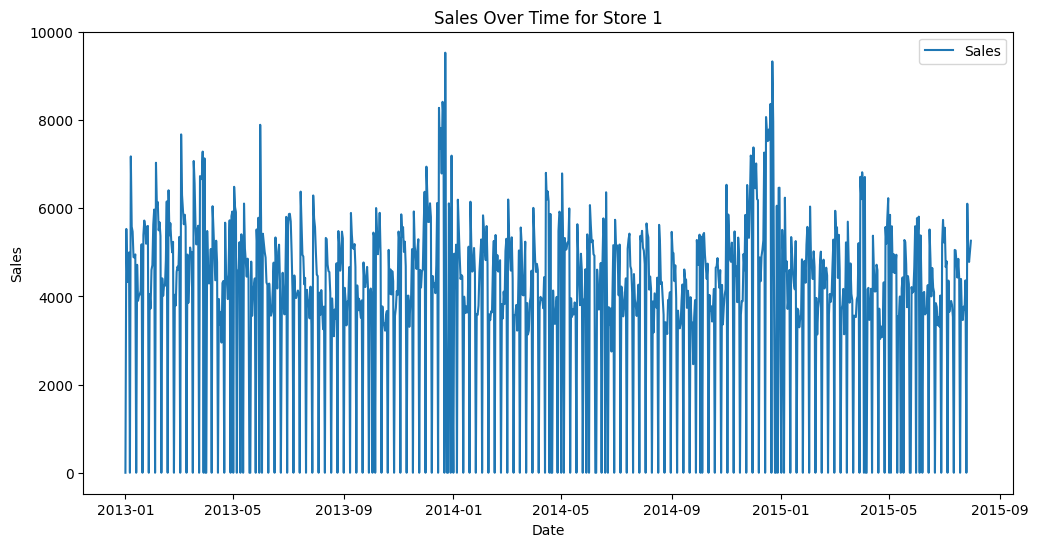

ADF Statistic: -4.368104368168497
p-value: 0.0003378834614142451
Critical Values:
   1%: -3.4374778690219956
   5%: -2.864686684217556
   10%: -2.5684454926748583


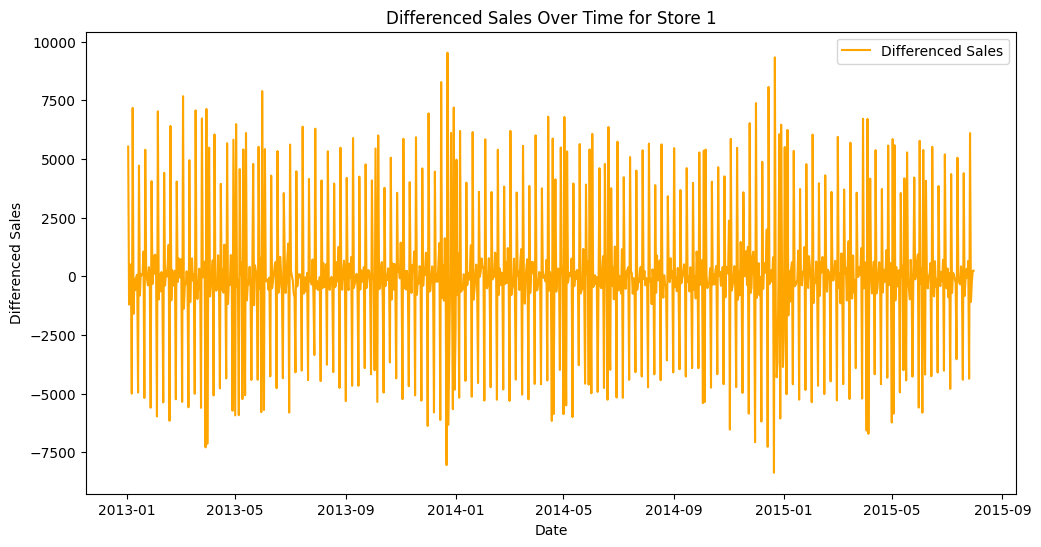

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - loss: 0.1820 - val_loss: 0.1546
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1800 - val_loss: 0.1439
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1654 - val_loss: 0.1268
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.1385 - val_loss: 0.1054
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1016 - val_loss: 0.0925
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0991 - val_loss: 0.0936
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0938 - val_loss: 0.0882
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0961 - val_loss: 0.0789
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0870 - val_loss: 0.0968
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0989 - val_loss: 0.0760
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0840 - val_loss: 0.0739
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0

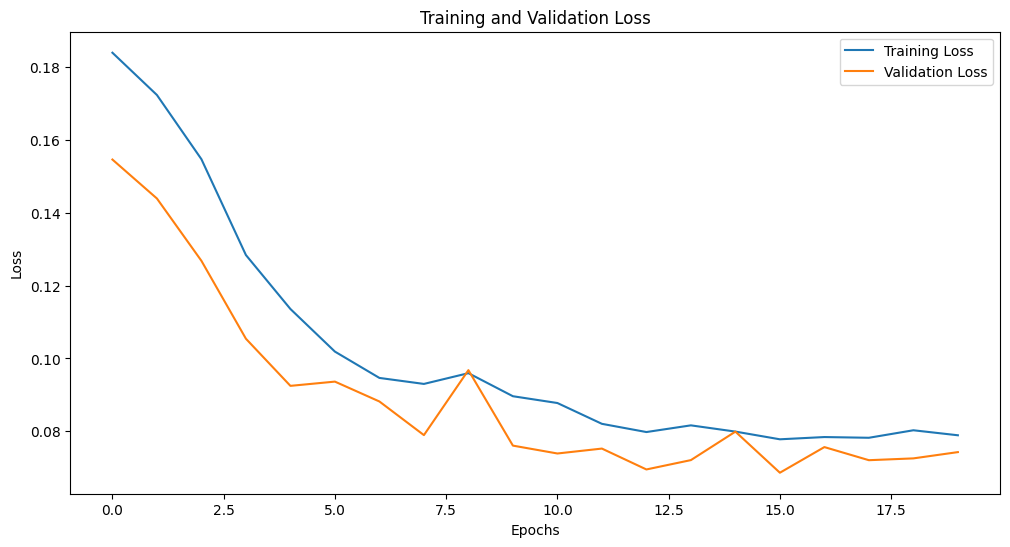

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step
Mean Absolute Error (MAE): 911.8884627602317
Root Mean Squared Error (RMSE): 1298.2076309664344


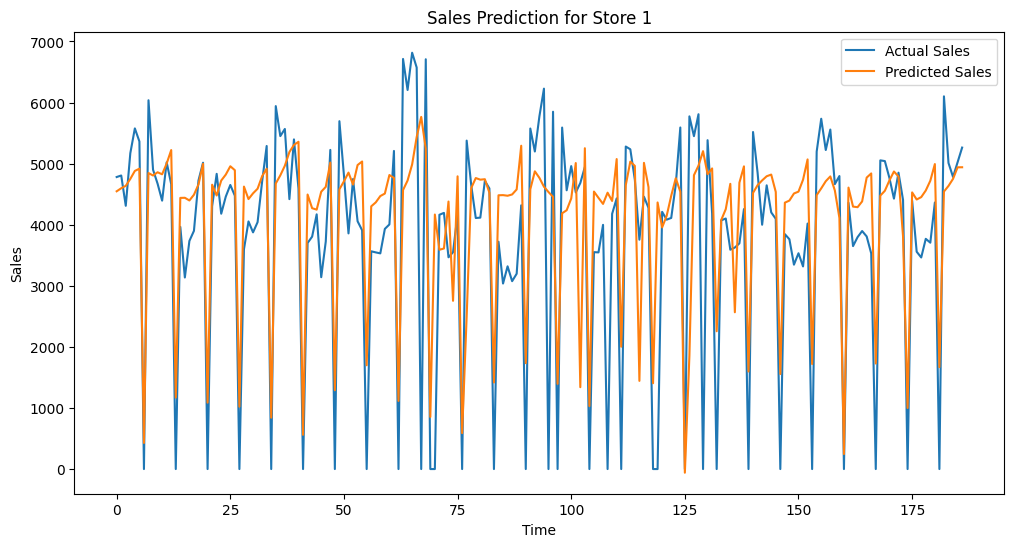

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Step 1: Prepare Time Series Data
# Select a specific store for time series analysis (e.g., Store 1)
store_id = 1
store_data = train_df[train_df['Store'] == store_id][['Date', 'Sales']]

# Sort by date
store_data = store_data.sort_values('Date')

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(store_data['Date'], store_data['Sales'], label='Sales')
plt.title(f'Sales Over Time for Store {store_id}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Step 2: Check if the Time Series is Stationary
# Perform Augmented Dickey-Fuller test to check stationarity
from statsmodels.tsa.stattools import adfuller

result = adfuller(store_data['Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# If p-value > 0.05, the time series is not stationary
# Differencing can be used to make it stationary
store_data['SalesDiff'] = store_data['Sales'].diff().dropna()

# Plot differenced data
plt.figure(figsize=(12, 6))
plt.plot(store_data['Date'].iloc[1:], store_data['SalesDiff'].iloc[1:], label='Differenced Sales', color='orange')
plt.title(f'Differenced Sales Over Time for Store {store_id}')
plt.xlabel('Date')
plt.ylabel('Differenced Sales')
plt.legend()
plt.show()

# Step 3: Transform Time Series Data into Supervised Learning Format
# Use a sliding window approach to create input (X) and output (y) pairs
def create_sliding_window(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Scale the data to the range (-1, 1)
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_sales = scaler.fit_transform(store_data[['Sales']])

# Define window size (e.g., 7 days)
window_size = 7
X, y = create_sliding_window(scaled_sales, window_size)

# Reshape X to be compatible with LSTM input (samples, timesteps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and validation sets
split = int(0.8 * len(X))
X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]

# Step 4: Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(window_size, 1)))  # First LSTM layer
model.add(LSTM(50, return_sequences=False))  # Second LSTM layer
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Step 5: Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 6: Evaluate the Model
# Predict on the validation set
y_pred = model.predict(X_val)

# Inverse transform the scaled predictions and actual values
y_pred_inv = scaler.inverse_transform(y_pred)
y_val_inv = scaler.inverse_transform(y_val.reshape(-1, 1))

# Calculate evaluation metrics
mae = mean_absolute_error(y_val_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_val_inv, y_pred_inv))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot predictions vs. actual values
plt.figure(figsize=(12, 6))
plt.plot(y_val_inv, label='Actual Sales')
plt.plot(y_pred_inv, label='Predicted Sales')
plt.title(f'Sales Prediction for Store {store_id}')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

Reloading Tuner from tuner_results/store_sales_lstm/tuner0.json
Best Hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x7c355b67d1e0>
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1843
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1694
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1249
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0852
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0848
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0775
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0815
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0768
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0720
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0705
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0780
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0687
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0588
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0625
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0825
Epoch 16/50
30/30 ━━━━━━━━━━

Final model saved as final_lstm_model_store_1.h5
Shape of X_test: (41, 7, 1)
X_test contains NaN values: False
X_test contains infinite values: False
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 284ms/step
Shape of y_pred: (41, 1)
Predictions: [[-0.5303496 ]
 [-0.5303496 ]
 [-0.5303496 ]
 [-0.5303496 ]
 [-0.5303496 ]
 [-0.5303496 ]
 [-0.5303496 ]
 [-0.5303496 ]
 [-0.5303496 ]
 [-0.5303496 ]
 [-0.5303496 ]
 [-0.5303496 ]
 [-0.5303496 ]
 [-0.5303496 ]
 [-0.5303496 ]
 [-0.5303496 ]
 [-0.5303496 ]
 [-0.5303496 ]
 [-0.5303496 ]
 [-0.5303496 ]
 [-0.5303496 ]
 [-0.5303496 ]
 [-0.5303496 ]
 [-0.5303496 ]
 [-0.5303496 ]
 [-0.5303496 ]
 [-0.5303496 ]
 [-0.5303496 ]
 [-0.5303496 ]
 [-0.5303496 ]
 [-0.53034985]
 [-0.53034985]
 [-0.5303496 ]
 [-0.5303496 ]
 [-0.5303496 ]
 [-0.5303496 ]
 [-0.5303496 ]
 [-0.5303496 ]
 [-0.5303498 ]
 [-0.5303498 ]
 [-0.5303498 ]]


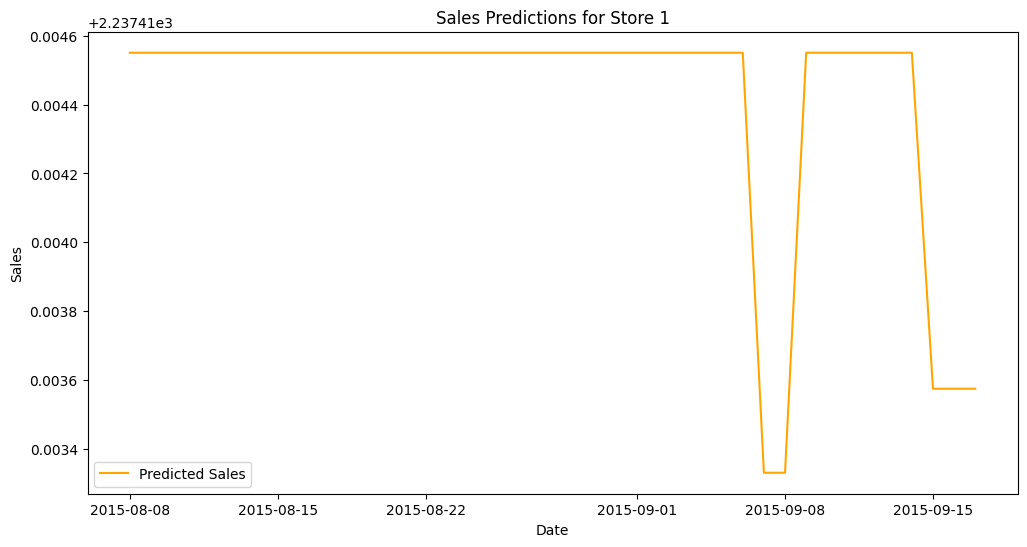

Predictions saved to predictions_store_1.csv


In [46]:
# Install keras-tuner if not already installed
!pip install keras-tuner

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
import joblib

# Step 1: Prepare Time Series Data
# Select a specific store for time series analysis (e.g., Store 1)
store_id = 1
store_data = train_df[train_df['Store'] == store_id][['Date', 'Sales']]

# Sort by date
store_data = store_data.sort_values('Date')

# Differencing to make the time series stationary
store_data['SalesDiff'] = store_data['Sales'].diff().dropna()

# Scale the data to the range (-1, 1)
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_sales = scaler.fit_transform(store_data[['Sales']])

# Define window size (e.g., 7 days)
window_size = 7

# Create sliding window data
def create_sliding_window(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

X, y = create_sliding_window(scaled_sales, window_size)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Step 2: Hyperparameter Tuning with Keras Tuner
def build_model(hp):
    model = Sequential()
    model.add(LSTM(
        units=hp.Int('units', min_value=32, max_value=128, step=32),
        return_sequences=True,
        input_shape=(window_size, 1)
    ))
    model.add(LSTM(
        units=hp.Int('units', min_value=32, max_value=128, step=32),
        return_sequences=False
    ))
    model.add(Dense(1))
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='mean_squared_error'
    )
    return model

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=3,
    directory='tuner_results',
    project_name='store_sales_lstm'
)

# Perform hyperparameter search
tuner.search(X, y, epochs=20, validation_split=0.2, verbose=1)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hps}")

# Step 3: Train the Final Model
# Build the model with the best hyperparameters
final_model = tuner.hypermodel.build(best_hps)

# Train the final model on the entire dataset
history = final_model.fit(X, y, epochs=50, batch_size=32, verbose=1)

# Step 4: Save the Final Model
model_filename = f"final_lstm_model_store_{store_id}.h5"
final_model.save(model_filename)
print(f"Final model saved as {model_filename}")

# Step 5: Make Predictions on Test Data
# Prepare test data for the same store
test_store_data = test_df[test_df['Store'] == store_id][['Date']]

# Sort by date
test_store_data = test_store_data.sort_values('Date')

# Fill the 'Sales' column with a placeholder value (e.g., 0)
test_store_data['Sales'] = 0

# Scale the test data (using the same scaler as the training data)
scaled_test_sales = scaler.transform(test_store_data[['Sales']])

# Create sliding window data for the test set
X_test, _ = create_sliding_window(scaled_test_sales, window_size)
print(f"Shape of X_test: {X_test.shape}")

# Check X_test for NaN or invalid values
print("X_test contains NaN values:", np.isnan(X_test).any())
print("X_test contains infinite values:", np.isinf(X_test).any())

# Reshape X_test for LSTM input
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Make predictions
y_pred = final_model.predict(X_test)
print(f"Shape of y_pred: {y_pred.shape}")
print(f"Predictions: {y_pred}")

# Inverse transform the predictions
y_pred_inv = scaler.inverse_transform(y_pred)

# Add predictions to the test data
test_store_data['PredictedSales'] = np.nan
test_store_data.iloc[window_size:, test_store_data.columns.get_loc('PredictedSales')] = y_pred_inv.flatten()

# Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(test_store_data['Date'], test_store_data['PredictedSales'], label='Predicted Sales', color='orange')
plt.title(f'Sales Predictions for Store {store_id}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Save predictions to a CSV file
test_store_data.to_csv(f"predictions_store_{store_id}.csv", index=False)
print(f"Predictions saved to predictions_store_{store_id}.csv")

Mean Absolute Error (MAE): 2237.4144197789633
Root Mean Squared Error (RMSE): 2237.4144197789915
Scaler saved as scaler_store_1.pkl
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 416ms/step


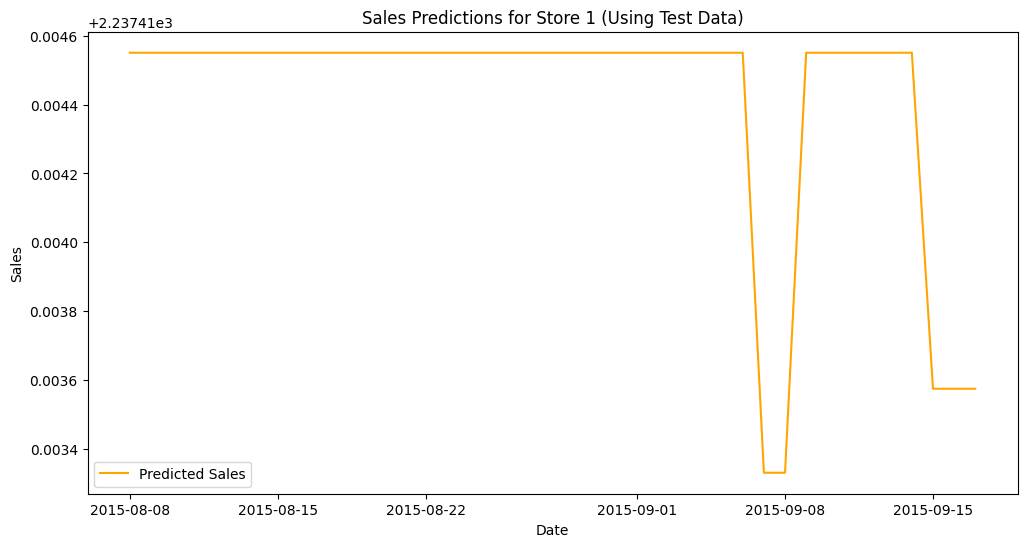

Predictions saved to predictions_store_1_test_data.csv


In [56]:
# Step 1: Evaluate Model Performance
# Assuming y_true contains the actual sales values for the test period
y_true = test_store_data['Sales'].iloc[window_size:].values
y_pred = test_store_data['PredictedSales'].iloc[window_size:].values

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Step 2: Save the Scaler
scaler_filename = f"scaler_store_{store_id}.pkl"
joblib.dump(scaler, scaler_filename)
print(f"Scaler saved as {scaler_filename}")

# Step 3: Load the Model and Scaler for Future Use
loaded_model = load_model(model_filename)
loaded_scaler = joblib.load(scaler_filename)

# Step 4: Make Predictions on Test Data
# Prepare test data for the same store
test_store_data = test_df[test_df['Store'] == store_id][['Date']]

# Sort by date
test_store_data = test_store_data.sort_values('Date')

# Fill the 'Sales' column with a placeholder value (e.g., 0)
test_store_data['Sales'] = 0

# Scale the test data (using the same scaler as the training data)
scaled_test_sales = loaded_scaler.transform(test_store_data[['Sales']])

# Create sliding window data for the test set
X_test, _ = create_sliding_window(scaled_test_sales, window_size)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Make predictions
y_pred_test = loaded_model.predict(X_test)
y_pred_test_inv = loaded_scaler.inverse_transform(y_pred_test)

# Add predictions to the test data
test_store_data['PredictedSales'] = np.nan
test_store_data.iloc[window_size:, test_store_data.columns.get_loc('PredictedSales')] = y_pred_test_inv.flatten()

# Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(test_store_data['Date'], test_store_data['PredictedSales'], label='Predicted Sales', color='orange')
plt.title(f'Sales Predictions for Store {store_id} (Using Test Data)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Save predictions to a CSV file
test_store_data.to_csv(f"predictions_store_{store_id}_test_data.csv", index=False)
print(f"Predictions saved to predictions_store_{store_id}_test_data.csv")